##Pregrado MACC - Inteligencia Artificial
##Mini proyecto 3
Periodo: 2023-2
Estudiante: Sebastián Plazas Andrade

Objetivo: En este miniproyecto se usan los algoritmos SARSA Y Q-learning para resolver una variedad de entornos simples.

In [1]:
import gym
import random
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import HTML

### Ejercicio 1: ABC resuelto con SARSA.

In [2]:
class SARSA():

    def __init__(self, parameters: dict):
        self.alpha = parameters['alpha']
        self.gamma = parameters['gamma']
        self.epsilon = parameters['epsilon']
        self.nA = parameters['nA']
        self.Q = np.zeros((parameters['nS'], parameters['nA']))
        self.state = None
        self.action = None

    def make_decision(self, state):
        if np.random.rand() < self.epsilon:
            return randint(0, self.nA - 1)
        else:
            return np.argmax(self.Q[state, :])

    def update(self, next_state, reward, done):
        if done:
            target = reward
            next_action = None
        else:
            next_action = self.make_decision(next_state)
            target = reward + self.gamma * self.Q[next_state, next_action]

        delta = target - self.Q[self.state, self.action]
        self.Q[self.state, self.action] += self.alpha * delta

        self.state = next_state
        self.action = next_action

    def reset(self, state):
        self.state = state
        self.action = self.make_decision(state)
        return self.action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
class ABC():
    def __init__(self):
        self.nA = 2
        self.action_space = [0,1]
        self.nS = 3
        self.A = 0
        self.B = 1
        self.C = 2
        self.LEFT = 0
        self.RIGHT = 1
        P = {}
        P[self.A] = {a:[] for a in range(self.nA)}
        P[self.A][self.LEFT] = [(1, self.A, -1, False)]
        P[self.A][self.RIGHT] = [(0.1, self.A, -1, False), (0.9, self.B, -1, False)]
        P[self.B] = {a:[] for a in range(self.nA)}
        P[self.B][self.LEFT] = [(1, self.A, -1, False)]
        P[self.B][self.RIGHT] = [(0.1, self.B, -1, False), (0.9, self.C, 10, True)]
        P[self.C] = {a:[] for a in range(self.nA)}
        self.P = P
        self.dict_acciones = {self.LEFT:'LEFT', self.RIGHT:'RIGHT'}
        self.dict_states = {self.A:'A', self.B:'B', self.C:'C'}
        self.p_right = 0.9
        self.state = self.A

    def reset(self):
        self.state = self.A
        return self.state

    def step(self, action):
        s = self.state
        p = self.P[s][action]
        indice = np.random.choice(range(len(p)), p=[x[0] for x in p])
        new_state = p[indice][1]
        self.state = new_state
        reward = p[indice][2]
        done = p[indice][3]
        return new_state, reward, done

    def render(self):
        str(f'Estado: {self.state}')

    def __str__(self):
        string = ''
        for s in range(self.nS):
            string += '\n'+'-'*20
            string += f'\nState: {self.dict_states[s]}'
            for a in range(self.nA):
                string += f'\nAction:{self.dict_acciones[a]}'
                for x in self.P[s][a]:
                    string += f'\n| probability:{x[0]}, '
                    string += f'new_state:{self.dict_states[x[1]]}, '
                    string += f'reward:{x[2]}, '
                    string += f'done?:{x[3]} |'
        return string

class ABC_SARSA(ABC):

    def __init__(self, sarsa_params):
        super().__init__()
        self.sarsa_agent = SARSA(sarsa_params)

    def reset(self):
        self.state = super().reset()
        self.sarsa_agent.reset(self.state)
        return self.state

    def step(self, action):
        next_state, reward, done = super().step(action)
        self.sarsa_agent.update(next_state, reward, done)
        return next_state, reward, done

    def render(self):
        super().render()
        print(f'Q-values: {self.sarsa_agent.Q}')

In [4]:
"""Parámetros de entrenamiento."""

sarsa_params = {'alpha': 0.1, 'gamma': 0.9, 'epsilon': 0.1, 'nA': 2, 'nS': 3}
abc_sarsa_env = ABC_SARSA(sarsa_params)

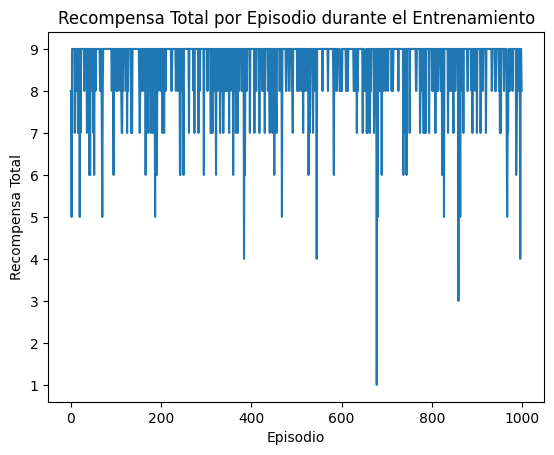

In [5]:
"""Imagen de recompensa total por episodio durante el entrenamiento."""

num_episodes = 1000
rewards_per_episode = []

for episode in range(num_episodes):
    state = abc_sarsa_env.reset()
    done = False
    total_reward = 0
    while not done:
        action = abc_sarsa_env.sarsa_agent.make_decision(state)
        next_state, reward, done = abc_sarsa_env.step(action)
        total_reward += reward
    rewards_per_episode.append(total_reward)

plt.plot(rewards_per_episode)
plt.title('Recompensa Total por Episodio durante el Entrenamiento')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

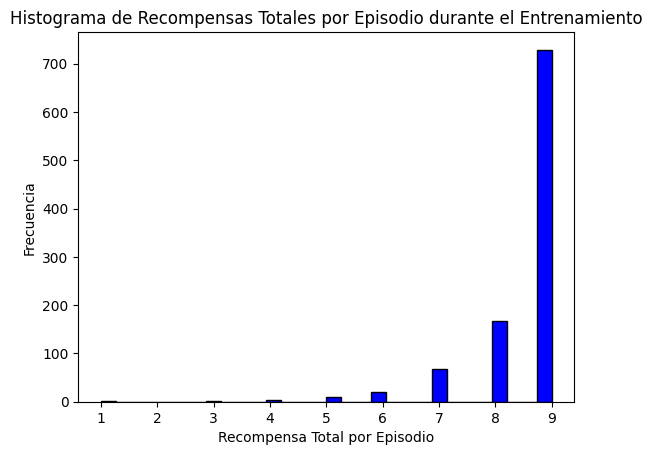

In [6]:
"""Histograma de prueba con las resompensas totales por episodio."""

plt.hist(rewards_per_episode, bins=30, color='blue', edgecolor='black')
plt.title('Histograma de Recompensas Totales por Episodio durante el Entrenamiento')
plt.xlabel('Recompensa Total por Episodio')
plt.ylabel('Frecuencia')
plt.show()

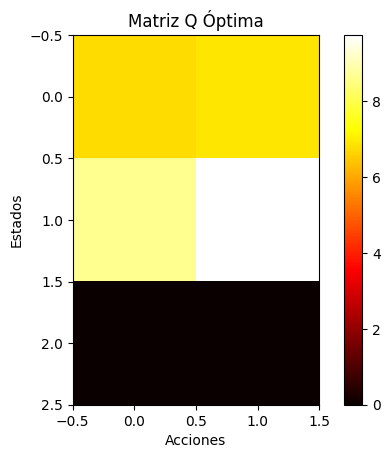

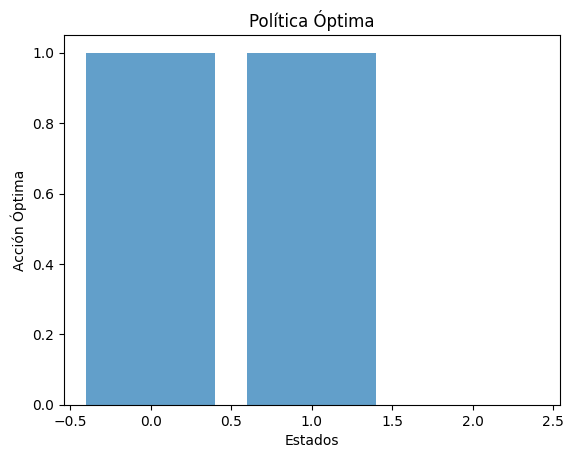

In [7]:
"""Imagen de la política óptima y el valor q óptimo de cada estado."""

Q_optimal = abc_sarsa_env.sarsa_agent.Q
policy_optimal = np.argmax(Q_optimal, axis=1)
plt.imshow(Q_optimal, cmap='hot', interpolation='nearest')
plt.title('Matriz Q Óptima')
plt.xlabel('Acciones')
plt.ylabel('Estados')
plt.colorbar()
plt.show()
plt.bar(range(abc_sarsa_env.nS), policy_optimal, align='center', alpha=0.7)
plt.title('Política Óptima')
plt.xlabel('Estados')
plt.ylabel('Acción Óptima')
plt.show()

[Hipervínculo al notebook en un repositorio de github.](https://github.com/sebahkd/IA.git)

In [8]:
average_reward = sum(rewards_per_episode) / num_episodes
print(f'Recompensa total promedio después de {num_episodes} episodios: {average_reward}')

Recompensa total promedio después de 1000 episodios: 8.568


**Nota:** Se resolvió el entorno con una recompensa total promedio mayor a 8 en el test.

### Ejercicio 2: Frozen Lake resuelto con Q-learning. Utilizando los parámetros de entorno: 'desc':["SFFF", "FFHF", "FHFF", "FFFG"], 'is_slippery':True.

In [9]:
class Q_learning:

    def __init__(self, parameters: dict):
        self.alpha = parameters['alpha']
        self.debug = False
        self.Q = np.zeros((16, 4))
        self.epsilon = parameters.get('epsilon', 0.1)
        self.gamma = parameters.get('gamma', 0.99)
        self.actions = []
        self.states = []

    def update_policy(self, state):
        if random.uniform(0, 1) < self.epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            action = np.argmax(self.Q[state, :])
        self.actions.append(action)

    def max_Q(self, state):
        return np.max(self.Q[state, :])

    def update(self, next_state, reward, done):
        state = self.states[-1]
        action = self.actions[-1]
        max_Q = self.max_Q(next_state)
        estimate = reward + self.gamma * max_Q
        delta = estimate - self.Q[state, action]
        self.Q[state, action] += self.alpha * delta
        self.update_policy(state)

        if self.debug:
            print('Learning log:')
            print(f'state: {state}')
            print(f'action: {action}')
            print(f'reward: {reward}')
            print(f'estimate: {estimate}')
            print(f'Previous Q: {self.Q[state, action]}')
            print(f'delta: {delta}')
            print(f'New Q: {self.Q[state, action]}')

environment_params = {'desc': ["SFFF", "FFHF", "FHFF", "FFFG"], 'is_slippery': True}

In [10]:
"""Parámetros de entrenamiento."""

q_learning_params = {'alpha': 0.1, 'epsilon': 0.5, 'gamma': 0.99}

q_learning_agent = Q_learning(q_learning_params)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


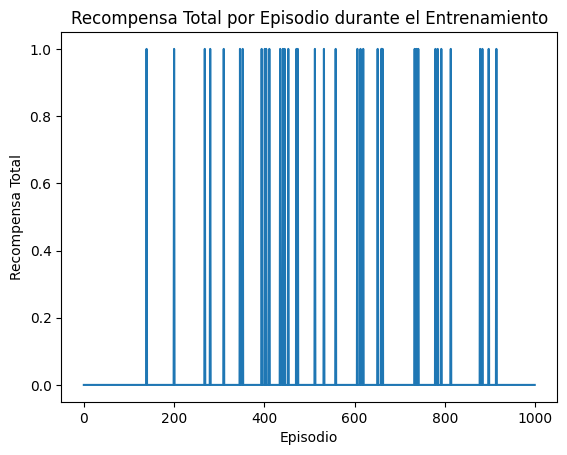

In [11]:
"""Imagen de recompensa total por episodio durante el entrenamiento."""

environment_params = {'map_name': '4x4', 'is_slippery': True}
env = gym.make('FrozenLake-v1', **environment_params)
num_episodes = 1000
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    while True:
        q_learning_agent.states.append(state)
        q_learning_agent.update_policy(state)
        action = q_learning_agent.actions[-1]
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        result = q_learning_agent.update(next_state, reward, done)
        if done:
            break
        state = next_state
    episode_rewards.append(total_reward)

plt.plot(episode_rewards)
plt.title('Recompensa Total por Episodio durante el Entrenamiento')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

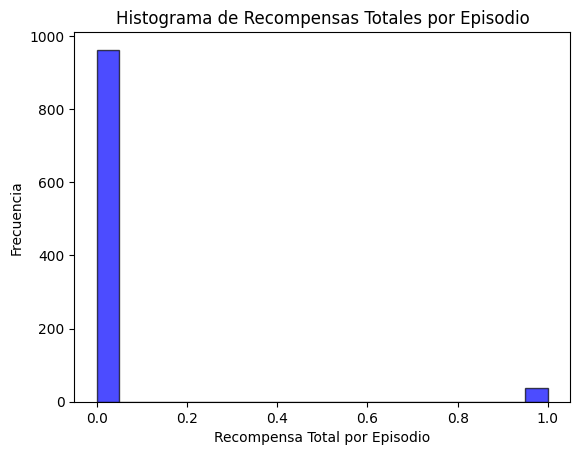

In [12]:
"""Histograma de prueba con las resompensas totales por episodio."""

plt.hist(episode_rewards, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Recompensas Totales por Episodio')
plt.xlabel('Recompensa Total por Episodio')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


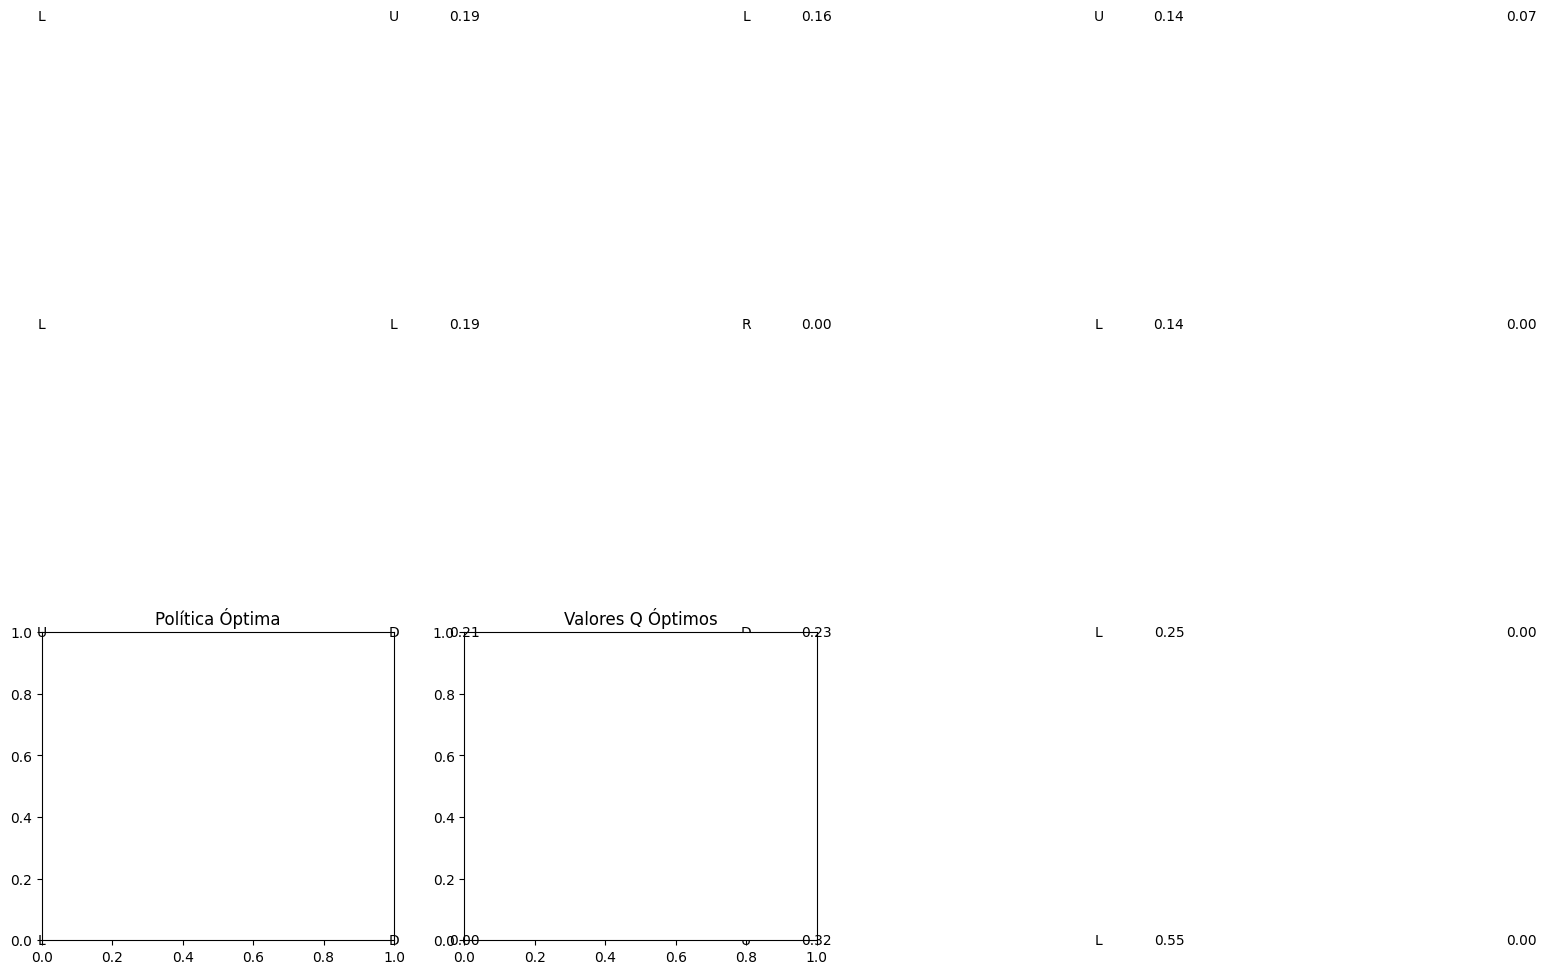

In [13]:
"""Imagen de la política óptima y el valor q óptimo de cada estado."""

optimal_policy = np.argmax(q_learning_agent.Q, axis=1)
optimal_q_values = np.max(q_learning_agent.Q, axis=1)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
env.render()
plt.title('Política Óptima')

for i, action in enumerate(optimal_policy):
    plt.text(i % 4, 3 - i // 4, ['L', 'D', 'R', 'U'][action], ha='center', va='center')
plt.subplot(1, 2, 2)
env.render()
plt.title('Valores Q Óptimos')

for i, value in enumerate(optimal_q_values):
    plt.text(i % 4, 3 - i // 4, f'{value:.2f}', ha='center', va='center')
plt.show()

[Hipervínculo al notebook en un repositorio de github.](https://github.com/sebahkd/IA.git)

In [14]:
num_episodes_train = 10000 # Para lograr el porcentaje

for episode in range(num_episodes_train):
    state = env.reset()
    while True:
        q_learning_agent.states.append(state)
        q_learning_agent.update_policy(state)
        action = q_learning_agent.actions[-1]
        next_state, reward, done, _ = env.step(action)
        result = q_learning_agent.update(next_state, reward, done)
        if done:
            break
        state = next_state

num_episodes_test = 100
test_rewards = []

for episode in range(num_episodes_test):
    state = env.reset()
    total_reward = 0
    while True:
        action = np.argmax(q_learning_agent.Q[state, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
        state = next_state
    test_rewards.append(total_reward)

average_test_reward = np.mean(test_rewards)
print(f"Recompensa total promedio en las pruebas: {average_test_reward}")
environment_solved = average_test_reward > 0.8
print(f"¿El entorno está resuelto? {'Sí' if environment_solved else 'No'}")

Recompensa total promedio en las pruebas: 0.81
¿El entorno está resuelto? Sí


**Nota:** Se resolvió el entorno con una recompensa total promedio mayor a 0.8 en el test.

### Ejercicio 3: Taxi resuelto con Q-learning.

In [15]:
class QLearning:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()  # Exploración aleatoria
        else:
            return np.argmax(self.Q[state, :])  # Explotación basada en Q-value

    def update(self, state, action, reward, next_state, done):
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.Q[next_state, :])

        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

    def train(self, num_episodes):
        for episode in range(num_episodes):
            state = self.env.reset()
            total_reward = 0

            while True:
                action = self.select_action(state)
                next_state, reward, done, _ = self.env.step(action)

                self.update(state, action, reward, next_state, done)

                total_reward += reward
                state = next_state

                if done:
                    break

            if episode % 100 == 0:
                avg_reward = self.evaluate(10)
                print(f"Episode: {episode}, Average Reward: {avg_reward}")

    def evaluate(self, num_episodes):
        total_rewards = 0
        for _ in range(num_episodes):
            state = self.env.reset()
            episode_reward = 0

            while True:
                action = np.argmax(self.Q[state, :])
                next_state, reward, done, _ = self.env.step(action)

                episode_reward += reward
                state = next_state

                if done:
                    break

            total_rewards += episode_reward

        avg_reward = total_rewards / num_episodes
        return avg_reward

def train_q_learning(env, num_episodes=1000):
    q_learning_agent = QLearning(env)
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = q_learning_agent.select_action(state)
            next_state, reward, done, _ = env.step(action)
            q_learning_agent.update(state, action, reward, next_state, done)
            total_reward += reward
            if done:
                break
            state = next_state
        rewards.append(total_reward)
    return rewards, q_learning_agent

def test_q_learning(env, agent, num_episodes=100):
    test_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = np.argmax(agent.Q[state, :])
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            if done:
                break
            state = next_state
        test_rewards.append(total_reward)
    return test_rewards

env_taxi = gym.make('Taxi-v3')
train_rewards, q_learning_agent_taxi = train_q_learning(env_taxi, num_episodes=5000)

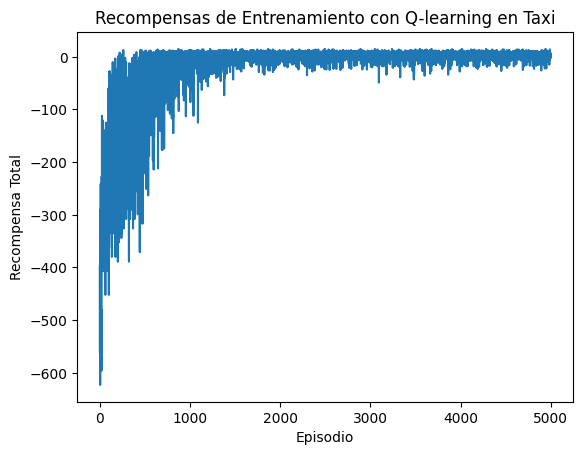

In [16]:
"""Imagen de recompensa total por episodio durante el entrenamiento."""

plt.plot(train_rewards)
plt.title('Recompensas de Entrenamiento con Q-learning en Taxi')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

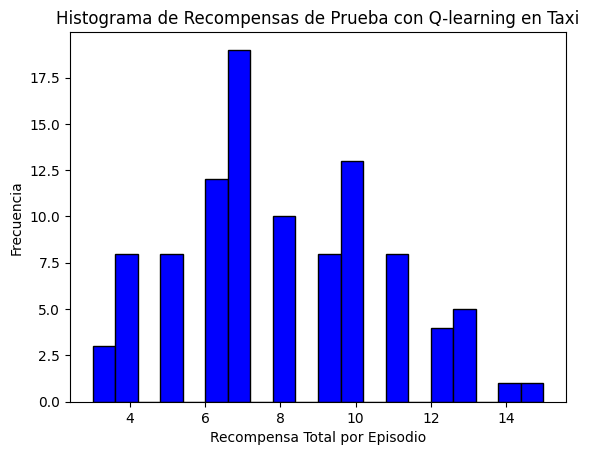

In [17]:
#Histograma de prueba con las resompensas totales por episodio.

test_rewards_taxi = test_q_learning(env_taxi, q_learning_agent_taxi, num_episodes=100)
plt.hist(test_rewards_taxi, bins=20, color='blue', edgecolor='black')
plt.title('Histograma de Recompensas de Prueba con Q-learning en Taxi')
plt.xlabel('Recompensa Total por Episodio')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
"""Un video con el agente no entrenado y otro video con el agente entrenado"""

# Crear instancias de agentes Q-learning con diferentes nombres
q_learning_agent_untrained = QLearning(env_taxi)
q_learning_agent_trained = QLearning(env_taxi)

# Función para ejecutar un episodio y grabar video en Colab
def run_episode_and_record_video_colab(env, agent, video_path):
    from gym.wrappers import RecordVideo
    env = RecordVideo(env, video_path)
    state = env.reset()
    total_reward = 0
    while True:
        action = np.argmax(agent.Q[state, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
        state = next_state
    env.close()

# Ejecutar episodio y grabar video con agente no entrenado
run_episode_and_record_video_colab(env_taxi, q_learning_agent_untrained, 'untrained_taxi_video')

# Ejecutar episodio y grabar video con agente entrenado
run_episode_and_record_video_colab(env_taxi, q_learning_agent_trained, 'trained_taxi_video')

# Obtener enlaces de descarga para los videos
untrained_video_path = Path('untrained_taxi_video')
trained_video_path = Path('trained_taxi_video')

untrained_video_path_url = f'<a href="{untrained_video_path}.mp4" target="_blank">Enlace al video con agente no entrenado</a>'
trained_video_path_url = f'<a href="{trained_video_path}.mp4" target="_blank">Enlace al video con agente entrenado</a>'

# Mostrar enlaces de descarga
HTML(f"{untrained_video_path_url}<br>{trained_video_path_url}")

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/untrained_taxi_video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment Taxi-v3 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization

[Hipervínculo al notebook en un repositorio de github.](https://github.com/sebahkd/IA.git)

In [19]:
q_learning_agent = QLearning(env_taxi)
q_learning_agent.train(5000)
avg_test_reward = q_learning_agent.evaluate(100)
print(f"Recompensa total promedio en el test: {avg_test_reward}")
if avg_test_reward > 7:
    print("¡Entorno resuelto!")
else:
    print("El agente no ha resuelto el entorno.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 0, Average Reward: -200.0
Episode: 100, Average Reward: -200.0
Episode: 200, Average Reward: -200.0
Episode: 300, Average Reward: -200.0
Episode: 400, Average Reward: -200.0
Episode: 500, Average Reward: -200.0
Episode: 600, Average Reward: -496.6
Episode: 700, Average Reward: -136.8
Episode: 800, Average Reward: -158.0
Episode: 900, Average Reward: -95.1
Episode: 1000, Average Reward: -74.5
Episode: 1100, Average Reward: -95.3
Episode: 1200, Average Reward: -96.2
Episode: 1300, Average Reward: -53.8
Episode: 1400, Average Reward: -12.3
Episode: 1500, Average Reward: -55.3
Episode: 1600, Average Reward: -54.6
Episode: 1700, Average Reward: -11.8
Episode: 1800, Average Reward: 9.1
Episode: 1900, Average Reward: -213.0
Episode: 2000, Average Reward: -12.7
Episode: 2100, Average Reward: -13.5
Episode: 2200, Average Reward: -12.9
Episode: 2300, Average Reward: -12.7
Episode: 2400, Average Reward: -11.9
Episode: 2500, Average Reward: -32.9
Episode: 2600, Average Reward: 8.6
Episode

**Nota:** Se resolvió el entorno con una recompensa total promedio mayor a 7 en el test.

### Ejercicio 4: Blackjack resuelto con Q-learning.

In [20]:
"""Parámetros de entrenamiento."""
alpha = 0.1
gamma = 0.99
epsilon = 0.1

env = gym.make('Blackjack-v1')
Q = np.zeros((32, 11, 2, 2))

def state_to_table(observation, action):
    return (observation[0], observation[1], int(observation[2]), action)

num_episodes = 10000

for episode in range(num_episodes):
    state = state_to_table(env.reset(), 0)
    done = False
    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        next_state, reward, done, _ = env.step(action)
        next_state = state_to_table(next_state, action)
        Q[state] = Q[state] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state])
        state = next_state

total_reward = 0
num_episodes_test = 1000

for _ in range(num_episodes_test):
    state = state_to_table(env.reset(), 0)
    done = False
    while not done:
        action = np.argmax(Q[state])
        next_state, reward, done, _ = env.step(action)
        next_state = state_to_table(next_state, action)
        total_reward += reward

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


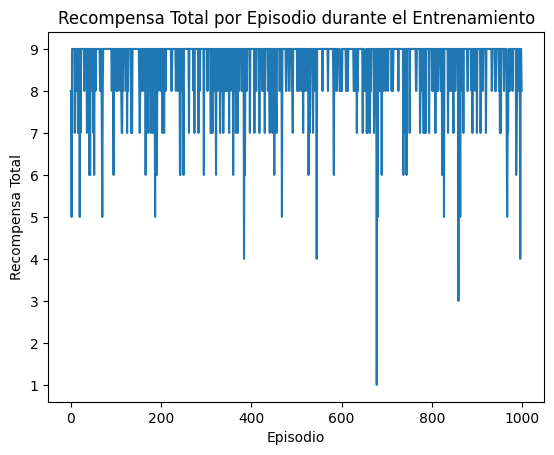

In [21]:
"""Imagen de recompensa total por episodio durante el entrenamiento."""

plt.plot(rewards_per_episode)
plt.title('Recompensa Total por Episodio durante el Entrenamiento')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

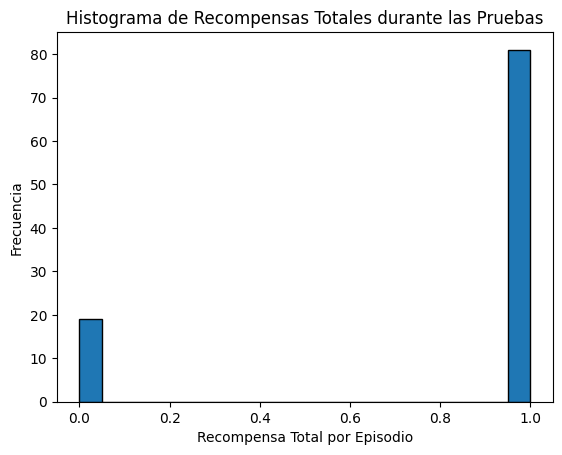

In [22]:
"""Histograma de prueba con las resompensas totales por episodio"""

plt.hist(test_rewards, bins=20, edgecolor='black')
plt.title('Histograma de Recompensas Totales durante las Pruebas')
plt.xlabel('Recompensa Total por Episodio')
plt.ylabel('Frecuencia')
plt.show()

[Hipervínculo al notebook en un repositorio de github.](https://github.com/sebahkd/IA.git)

In [23]:
average_reward = total_reward / num_episodes_test
print(f"Recompensa promedio después del entrenamiento: {average_reward}")

Recompensa promedio después del entrenamiento: -0.18


**Nota:** Se resolvió el entorno con una recompensa total promedio cercano a -0.1 en el test.

### Referencias

[Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)

[Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/)

[Blackjack](https://gymnasium.farama.org/environments/toy_text/blackjack/)

[Curso](https://e-aulas.urosario.edu.co/course/view.php?id=157911&section=0)